
# Exercice 9.4 from Practical astronomy

=======================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date : May 13th 2020


https://www.astro.ubc.ca/people/jvw/ASTROSTATS/pracstats_web_ed1.html#chapter9

9.4 The effect of surface density changes on $w(\theta)$ (D). 
- (a) Estimate the magnitude of the offset in $w(\theta)$ taking a simple model in which a survey is divided into two equal areas between which there is a fractional surface density shift $\epsilon$ (Equation 9.29). Find the expected step in $w(\theta)$ as a function of $\epsilon$; verify that a step of 20 per cent results in $\Delta w = 0.01$. 
- (b) Confirm this prediction with a toy-model simulation, putting say 100,000 random points in the region $0^o < \alpha < 60^o$, $-20^o < \delta < +20^o$ with a 20 per cent step at $\delta = 0^o$. 
Then calculate the $w(\theta)$ using say Landy-Szalay ($w_4$) estimator over the small-angular-scale range $\theta < 1^o$, checking that $w(\theta)$ agrees within errors with the prediction from equation 9.29. 


- Natural estimator
$$
w_1 = \frac{r(r − 1)}{n(n − 1)}\frac{DD}{RR}− 1
$$

- Peebles estimator
$$
w_2 =\frac{2r}{(n − 1)}\frac{DD}{DR}− 1
$$

- Landy-Szalay estimator
$$
w_3 = \frac{r(r − 1)}{n(n − 1)}
\frac{DD}{RR}
− \frac{(r − 1)}{n}\frac{DR}{RR}+ 1
$$

- Hamilton estimator
$$
w_4 =
\frac{4nr}
{(n − 1)(r − 1)}
\frac{DD \times RR}
{(DR)^2}
− 1
$$

In [198]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np
from os import listdir
import re

In [200]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [201]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points

In [202]:
from astropy import units as u
from astropy.coordinates import Angle

In [203]:
from astropy.table import Table

In [204]:
import pandas as pd

In [205]:
import time
from datetime import datetime,date
import dateutil.parser

In [206]:
import fortranformat as ff

In [207]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

# Configuration

In [230]:
FLAG_INPUT_EXCEL=False  # bug in writing the data
FLAG_WRITE_EXECEL=True  # write excel file 

## Data

In [231]:
file_data_excel="Ex9_4_data_v1.xlsx"
file_dataout_excel="Ex9_4_data_v2.xlsx"
file_data_ascii="dat_9_4_new.txt"

In [210]:
!head -15 $file_data_ascii

### Read Excel

In [211]:
if FLAG_INPUT_EXCEL:
    df=pd.read_excel(file_data_excel,header=3)

### Read ascii

In [212]:
#if not FLAG_INPUT_EXCEL:
    #data= np.loadtxt(file_data_ascii,delimiter=" " or "-")
    #dtype={'names': ('ra1', 'dec1', 'ra2', 'dec2', 'ra3', 'dec3','ra4','dec4','ra5','dec5'),
    #      'formats': (np.float, np.float, np.float, np.float,np.float,np.float,np.float,np.float,np.float,np.float)},
    #delimiter=None, skiprows=6)

In [229]:
if not FLAG_INPUT_EXCEL:
    reader = ff.FortranRecordReader('(5(2f8.4))') # specify the fortran format to read the line
    
    all_array = []
    all_comment= []
    f = open(file_data_ascii, 'r')
    idx=0
    for line in f:
        if line[0]=="#":  # skip comment
            all_comment.append(line)
            continue
        if idx<10:
            print("--------------------------------------------------------------------------")
            print("line1=",repr(line))
            
        line2= reader.read(line)   # decode the line à la fortran with the FortranRecordReader
        if idx<10:
            print("line2=",line2)    
        
        all_array.append(line2)
        idx+=1
            

--------------------------------------------------------------------------
line1= '  0.3131 17.8885  3.3352  1.2251  3.3975 13.4583  0.9336 10.6849  2.0312 -5.1609\n'
line2= [0.3131, 17.8885, 3.3352, 1.2251, 3.3975, 13.4583, 0.9336, 10.6849, 2.0312, -5.1609]
--------------------------------------------------------------------------
line1= '  1.4205  5.2371  0.8821 15.2794  1.5037  4.9917  0.2120  0.6078  0.7537 16.7172\n'
line2= [1.4205, 5.2371, 0.8821, 15.2794, 1.5037, 4.9917, 0.212, 0.6078, 0.7537, 16.7172]
--------------------------------------------------------------------------
line1= '  1.0876  0.5466  2.8838 -2.8891  2.4975  0.8135  1.6746 -3.7804  3.3994 -2.3655\n'
line2= [1.0876, 0.5466, 2.8838, -2.8891, 2.4975, 0.8135, 1.6746, -3.7804, 3.3994, -2.3655]
--------------------------------------------------------------------------
line1= '  0.1224 17.3763  3.0668  3.8521  3.2714 13.9623  3.2230 -7.4850  0.6092-15.4487\n'
line2= [0.1224, 17.3763, 3.0668, 3.8521, 3.2714, 13.9623, 3.

In [214]:
if 0:  # not used anymore better to use FortranRecordReader
    all_array = []
    
    
    f = open(file_data_ascii, 'r')
    idx=0
    for line in f:
        if line[0]=="#":  # skip comment
            continue
        if idx<10:
            print("--------------------------------------------------------------------------")
            print("line1=",repr(line))
        line2= [x.replace("-"," -").split() for x in line.split()]
        if idx<10:
            print("line2=",line2)
        line3=[]
        for word in line2:
            line3=line3+word
        if idx<10:
            print("line3=",line3)
        line4=[]
        for word in line3:
            line4.append(float(word))
            
        #line4=np.array(line4)
        if idx<10:
            print(len(line4)," line4=",line4)
            
        all_array.append(line4)
        idx+=1
        

In [215]:
all_array=np.array(all_array)

In [216]:
all_array.shape

(20000, 10)

### Make the DataFrame

In [217]:
df=pd.DataFrame()
df["ra1"]=all_array[:,0]
df["dec1"]=all_array[:,1]

df["ra2"]=all_array[:,2]
df["dec2"]=all_array[:,3]

df["ra3"]=all_array[:,4]
df["dec3"]=all_array[:,5]

df["ra4"]=all_array[:,6]
df["dec4"]=all_array[:,7]

df["ra5"]=all_array[:,8]
df["dec5"]=all_array[:,9]

In [218]:
df

,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,ra5,dec5
0,0.3131,17.8885,3.3352,1.2251,3.3975,13.4583,0.9336,10.6849,2.0312,-5.1609
1,1.4205,5.2371,0.8821,15.2794,1.5037,4.9917,0.2120,0.6078,0.7537,16.7172
2,1.0876,0.5466,2.8838,-2.8891,2.4975,0.8135,1.6746,-3.7804,3.3994,-2.3655
3,0.1224,17.3763,3.0668,3.8521,3.2714,13.9623,3.2230,-7.4850,0.6092,-15.4487
4,2.2212,10.0494,0.7852,12.8807,3.5167,-3.8370,3.3191,8.6512,2.2194,-14.8459
...,...,...,...,...,...,...,...,...,...,...
19995,3.4786,-10.8577,3.3115,17.7812,2.5005,11.3529,1.1696,1.0618,2.1677,15.7118
19996,3.8728,9.1666,3.3305,14.6860,3.2549,-8.4298,0.3396,-5.5810,0.3840,-2.8672
19997,1.1670,-11.7215,1.7122,4.2281,0.6288,-1.1927,1.7119,5.7130,3.0039,9.9205
19998,3.8055,-15.8063,3.5161,10.2171,1.6793,-6.4938,2.9604,-0.2060,3.2665,-13.7561


In [219]:
# right ascenssion in hours
df1=pd.concat([df["ra1"], df["ra2"],df["ra3"],df["ra4"],df["ra5"]],axis=0)

In [220]:
# declination in degrees
df2=pd.concat([df["dec1"], df["dec2"],df["dec3"],df["dec4"],df["dec5"]],axis=0)

In [221]:
# use Angle to convert into degrees
myra=Angle(df1.values,unit="hour")

In [222]:
myra.degree

array([ 4.6965, 21.3075, 16.314 , ..., 45.0585, 48.9975,  3.4155])

In [223]:
df_data=pd.DataFrame()

In [224]:
df_data["ra"]=myra.degree  # convert right ascenssion into degrees
df_data["dec"]=df2.values  # keep declination into degrees

In [225]:
#df_data=df_data.iloc[0:5000]

In [226]:
Nobj=len(df_data)
array_shape=df_data.shape

<Figure size 720x720 with 0 Axes>

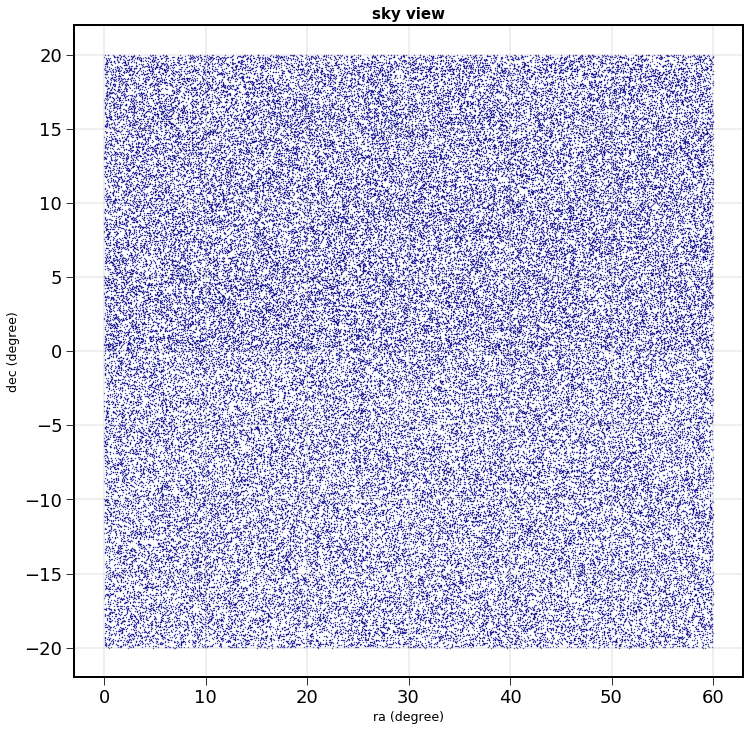

In [227]:
plt.figure(figsize=(10,10))
ax=df_data.plot.scatter("ra","dec",marker='.',s=0.5,c='DarkBlue',title="sky view",figsize=(12,12))
ax.set_xlabel("ra (degree)")
ax.set_ylabel("dec (degree)")
ax.grid()

In [234]:
if not FLAG_INPUT_EXCEL and FLAG_WRITE_EXECEL:
    df.to_excel(file_dataout_excel,index=False)

In [228]:
alert False

SyntaxError: invalid syntax (<ipython-input-228-0039b9705ac8>, line 1)

# Generate random array

In [ ]:
NBREAL=10
all_randomsky=[]
for ir in np.arange(NBREAL): 
    random_sky=np.random.uniform(0,5,array_shape)
    all_randomsky.append(random_sky)

In [ ]:
df_n=pd.DataFrame()

In [ ]:
df_n["ra"]=random_sky[:,0]
df_n["dec"]=random_sky[:,1]

# Correlation function

In [ ]:
FLAG_FIGFILE=False

## correlation computation config

In [ ]:
ra0=0
dec0=0

In [ ]:
def distance(ra,dec):
    return np.sqrt((ra-ra0)**2+(dec-dec0)**2)

In [ ]:
def dist_row(row):
    return distance(row["ra"],row["dec"])

In [ ]:
df_data.apply(dist_row, axis=1)

## Histogram config

In [ ]:
THETAS=np.arange(0,10,0.05) 
NBINS=len(THETAS)-1
BINSIZE=(THETAS[-1]-THETAS[0])/NBINS

In [ ]:
BINSTART=THETAS[0]
BINSTOP=THETAS[-1]+BINSIZE
NBINS+=1

## DD

In [ ]:
df3

In [ ]:
# loop on each element in the original dataframe
df0=df_data.copy()

df0.reset_index()
df_data.reset_index()

for index, row in df_data.iterrows():
    
    
    # isolate the current element
    ra0 = row['ra']
    dec0 = row['dec']
    
    if index%100==0:
        print(index," ra0=",ra0," dec0=",dec0)
    
    df0.drop(index,inplace=True) # erase one by one 
        
    df0["dist"] = df0.apply(dist_row, axis=1)
    
    if index==0:
        histo=np.histogram(df0["dist"].values,bins=NBINS,range=(BINSTART,BINSTOP))[0]
    else:
        histo+=np.histogram(df0["dist"].values,bins=NBINS,range=(BINSTART,BINSTOP))[0]

In [ ]:
NDD=histo

In [ ]:
NDD

In [ ]:
filename_histo=string_date + "_ndd_small.npy"
np.save(filename_histo, NDD)

In [ ]:
fig, ax = plt.subplots()
ax.bar(THETAS, NDD,facecolor="b")
#ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("$\\theta (deg)$")
ax.set_ylabel("$N_{DD}(\\theta)$")
ax.set_title("$N_{DD}(\\theta)$")
ax.grid()
if FLAG_FIGFILE:
    figname = string_date + "_ndd_small.png"
    plt.savefig(figname)
fig.show()

## DR

In [ ]:
# loop on each element in the original dataframe
df2=df_n.copy()
for index, row in df_data.iterrows():
    # isolate the current element
    ra0 = row['ra']
    dec0 = row['dec']
    
    if index%100==0:
        print(index," ra0=",ra0," dec0=",dec0)
        
        
    df2["dist"] = df2.apply(dist_row, axis=1)
    if index==0:
        histo=np.histogram(df2["dist"].values,bins=NBINS,range=(BINSTART,BINSTOP))[0]
    else:
        histo+=np.histogram(df2["dist"].values,bins=NBINS,range=(BINSTART,BINSTOP))[0]

In [ ]:
NDR=histo

In [ ]:
filename_histo=string_date + "_ndr_small.npy"
np.save(filename_histo, NDR)

In [ ]:
fig, ax = plt.subplots()
ax.bar(THETAS, NDR,facecolor="b")
#ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("$\\theta (rad)$")
ax.set_ylabel("$N_{DR}(\\theta)$")
ax.set_title("$N_{DR}(\\theta)$")
ax.grid()
if FLAG_FIGFILE:
    figname = string_date + "_ndr_small.png"
    plt.savefig(figname)
fig.show()

## RR

In [ ]:
# loop on each element in the original dataframe
df0 = df_n.copy()

df0.reset_index()
df_n.reset_index()

for index, row in df_n.iterrows():
    # isolate the current element
    ra0 = row['ra']
    dec0 = row['dec']

    if index % 1000 == 0:
        print(index, " ra0=", ra0, " dec0=", dec0)

    df0.drop(index, inplace=True)  # erase one by one

    df0["dist"] = df0.apply(dist_row, axis=1)
    if index == 0:
        histo = np.histogram(df0["dist"].values, bins=NBINS, range=(BINSTART, BINSTOP))[0]
    else:
        histo += np.histogram(df0["dist"].values, bins=NBINS, range=(BINSTART, BINSTOP))[0]


In [ ]:
NRR=histo

In [ ]:
filename_histo=string_date + "_nrr_small.npy"
np.save(filename_histo, NRR)

In [ ]:
fig, ax = plt.subplots()
ax.bar(THETAS, NRR,facecolor="b")
#ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("$\\theta (rad)$")
ax.set_ylabel("$N_{RR}(\\theta)$")
ax.set_title("$N_{RR}(\\theta)$")
ax.grid()
if FLAG_FIGFILE:
    figname = string_date + "_nrr_small.png"
    plt.savefig(figname)
fig.show()

# Correlation

In [ ]:
w1=NDD/NRR-1
w2=2*NDD/NDR-1
w3=NDD/NRR-NDR/NRR+1
w4=4*NDD*NRR/NDR**2-1

In [ ]:
plt.plot(THETAS,w1,label="$w_1$")
plt.plot(THETAS,w2,label="$w_2$")
plt.plot(THETAS,w3,label="$w_3$")
plt.plot(THETAS,w4,label="$w_4$")
plt.legend()
plt.ylim(-0.1,0.1)
plt.grid()
plt.xlabel("$\\theta (rad)$")
plt.ylabel("$w(\\theta) \; (rad)$")